# Problem definition: 
A B2B online marketplace wants to drive its top of the funnel growth by increasing its brand awareness.

The following is the sales funnel of the marketplace:


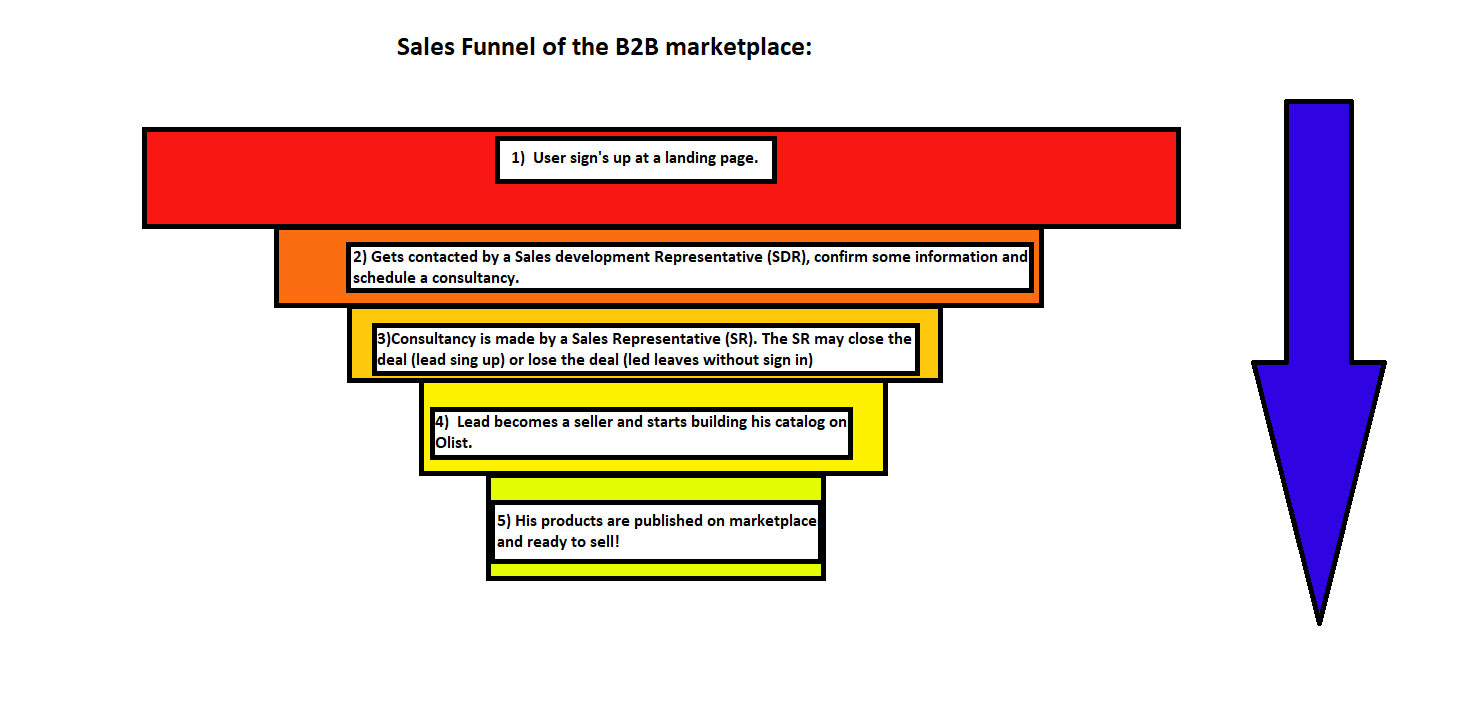



The data pertaining to their marketing efforts is provided. 
The data contains information about 3 major factors: 

1) Landing pages

2) Marketing channels 

3) Leads generated over the period of a year (June 2017 to June 2018) 

In [279]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

##  How have the leads changed over the span of an year? 

In [38]:
df1=pd.read_csv('olist_marketing_qualified_leads_dataset.csv')
df1

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search


In [39]:
df1.sort_values('first_contact_date',inplace=True)

In [40]:
df1.reset_index(inplace=True)


In [41]:
df1.drop('index',axis=1,inplace=True)

In [42]:
df1

,mql_id,first_contact_date,landing_page_id,origin
0,0b99dab71519032b917dc641cdd7ac5b,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,NaN
1,6dd0ef38856fd5fb21aed5223aea9e66,2017-06-14,8f08d2ef8b9aec2ec5118fbcf7f96f11,display
2,70bd89abdbdba90e471cd3d0bbdbac49,2017-06-16,8f08d2ef8b9aec2ec5118fbcf7f96f11,unknown
3,98c9832865e4ab224a1649e8e6e9a2a0,2017-06-20,b6cd08ac77c501fd6857f7916d2c24f3,email
4,e1e32379b464961f67fba6ddf6d4b3b7,2017-07-02,0b37d43dbde6452cdd94c17bf61a88e4,direct_traffic
...,...,...,...,...
7995,10bd89509a170e478e62697df43a5984,2018-05-31,58326e62183c14b0c03085c33b9fdc44,social
7996,6649b621033ae95a2e9da0dd9c99fa48,2018-05-31,320669df6e03fc8a691a1a4c61c56a32,unknown
7997,9012a1c75d959d58edd3a3fc1c0f5b75,2018-05-31,58326e62183c14b0c03085c33b9fdc44,social
7998,60041d31882e8d08e106b82dd4197a76,2018-05-31,ce1a65abd0973638f1c887a6efcfa82d,organic_search


In [43]:
df1['first_contact_date']=pd.to_datetime(df1['first_contact_date'])

In [44]:
df_temp = df1['first_contact_date'].value_counts().reset_index()

In [45]:
df_temp.rename({'index':'first_contact_date','first_contact_date':'counts'},inplace=True,axis=1)

In [46]:
df_temp.sort_values('first_contact_date')

,first_contact_date,counts
325,2017-06-14,2
333,2017-06-16,1
331,2017-06-20,1
334,2017-07-02,1
330,2017-07-03,1
...,...,...
151,2018-05-27,19
26,2018-05-28,57
88,2018-05-29,37
100,2018-05-30,30


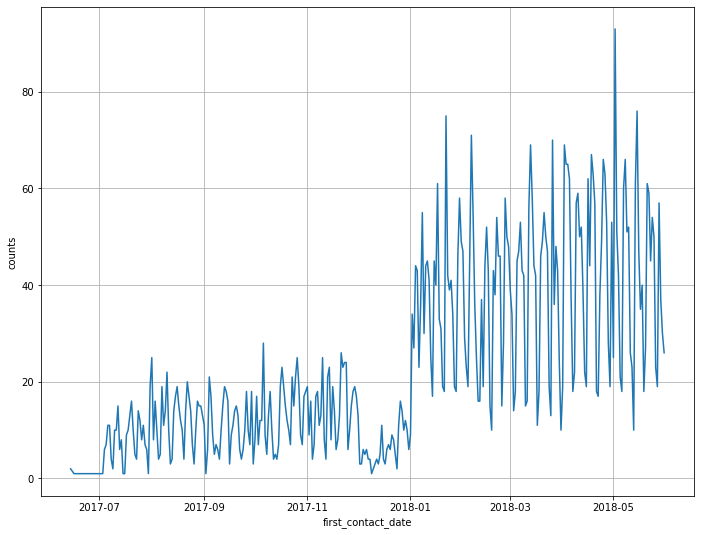

In [47]:
# draw lineplot
sns.lineplot(x="first_contact_date", y="counts", data=df_temp)
# figure size in inches
rcParams['figure.figsize'] = 11.7,9
#plt.xticks(list(df_temp['month']), rotation=90)
plt.grid()
plt.show()

### This chart is too granular since we are looking at a day to day basis change. Let us shift to a monthly analysis of leads. 

In [49]:
df_temp['month-year']=df_temp['first_contact_date']

In [50]:

for i in range(len(df_temp)):
    df_temp['month-year'][i] = str(df_temp['first_contact_date'][i].month ) +'-'+ str(df_temp['first_contact_date'][i].year)



<ipython-input-50-e9a99fbdae71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['month-year'][i] = str(df_temp['first_contact_date'][i].month ) +'-'+ str(df_temp['first_contact_date'][i].year)
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [51]:
df_temp

,first_contact_date,counts,month-year
0,2018-05-02,93,5-2018
1,2018-05-15,76,5-2018
2,2018-01-22,75,1-2018
3,2018-02-06,71,2-2018
4,2018-03-26,70,3-2018
...,...,...,...
331,2017-06-20,1,6-2017
332,2017-07-15,1,7-2017
333,2017-06-16,1,6-2017
334,2017-07-02,1,7-2017


In [53]:
df_temp['month-year']=pd.to_datetime(df_temp['month-year'])

In [57]:
df_temp1=df_temp.groupby('month-year')['counts'].sum().reset_index()

In [58]:
df_temp1

,month-year,counts
0,2017-06-01,4
1,2017-07-01,239
2,2017-08-01,386
3,2017-09-01,312
4,2017-10-01,416
5,2017-11-01,445
6,2017-12-01,200
7,2018-01-01,1141
8,2018-02-01,1028
9,2018-03-01,1174


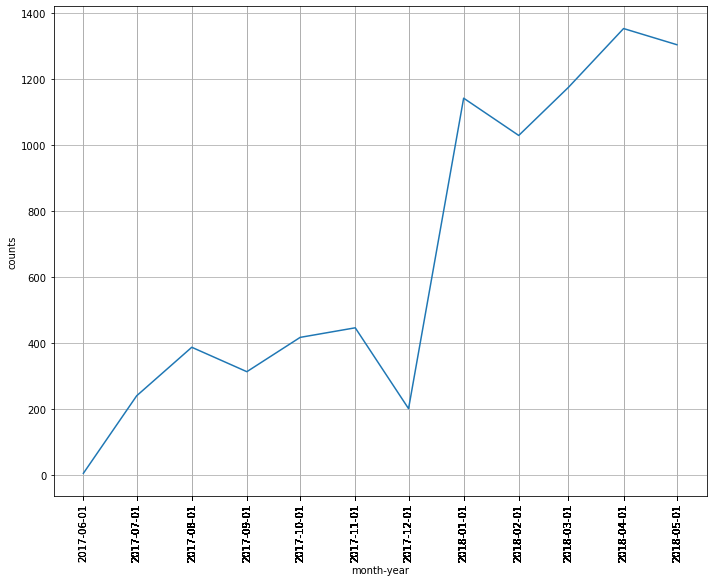

In [59]:
# draw lineplot
sns.lineplot(x="month-year", y="counts", data=df_temp1)
# figure size in inches
rcParams['figure.figsize'] = 11.7,9
plt.xticks(list(df_temp['month-year']), rotation=90)
plt.grid()
plt.show()


### Insights:

### 1) In the monthly analysis of leads, we observe that the number of leads sky rocketed in January 2018. 

### 2) This pattern of groth can be replicated if further investigated.

### 3) Let us further analyse this pattern and identify the key drivers of growth. 

### Two factors need to be analysed: 
#### 1) Landing pages 
#### 2) Marketing Channels

## Analysis of Landing pages :

In [60]:
df_temp=pd.DataFrame(df1['landing_page_id'].value_counts()).reset_index()
df_temp = df_temp.rename(columns={'index': 'landing_page_id', 'landing_page_id':'count'})
df_temp

,landing_page_id,count
0,b76ef37428e6799c421989521c0e5077,912
1,22c29808c4f815213303f8933030604c,883
2,58326e62183c14b0c03085c33b9fdc44,495
3,88740e65d5d6b056e0cda098e1ea6313,445
4,ce1a65abd0973638f1c887a6efcfa82d,394
...,...,...
490,9c0962a42379157493ed685d19844388,1
491,a5155c8274e4b6d13fe0db420a60a287,1
492,fc83c311415c9f67b6c7c87cf488b9c2,1
493,336d5ebc5436534e61d16e63ddfca327,1


In [61]:
sum=0
for i in range(len(df_temp['count'])):
    if sum > 0.8 * 7940:
        break
    else:
        sum=sum+df_temp['count'][i]
print(i) 

57


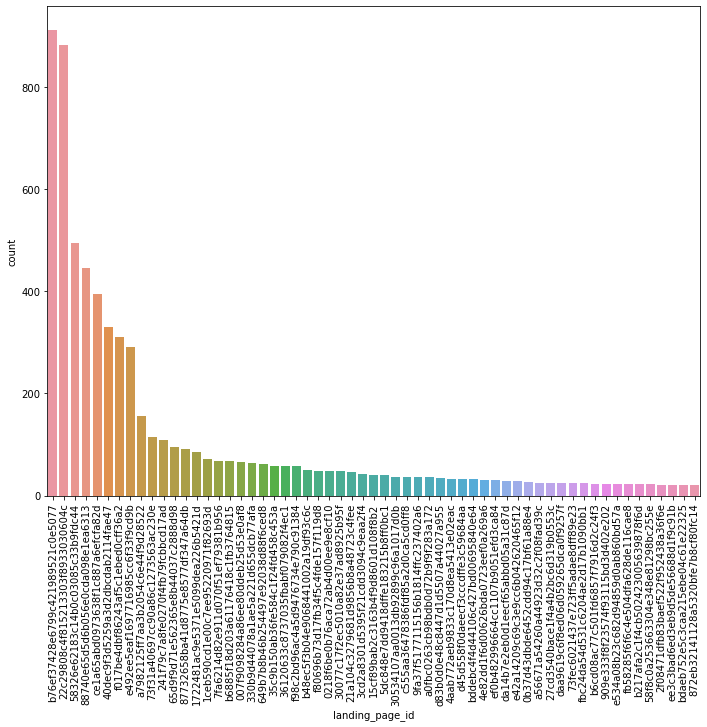

In [62]:
sns.barplot(x = 'landing_page_id',
            y = 'count',
            data = df_temp[:59])
plt.xticks(rotation=90)
plt.show()
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,10

### Insights: 

### 1) 495 Landing pages were developed out of which 58(11.7%) Landing pages bring in 80% of the leads.

### 2) 'b76ef37428e6799c421989521c0e5077' and '22c29808c4f815213303f8933030604c' bring in significantly more leads than the others.

### 3) The goal is to replicate the success of the above two landing pages. This can be done efficiently through further experimentation via A/B testing

## Analysis of Marketing Channels:

In [66]:
df_temp=pd.DataFrame(df1['origin'].value_counts()).reset_index()
df_temp = df_temp.rename(columns={'index': 'origin', 'origin':'count'})
df_temp

,origin,count
0,organic_search,2296
1,paid_search,1586
2,social,1350
3,unknown,1099
4,direct_traffic,499
5,email,493
6,referral,284
7,other,150
8,display,118
9,other_publicities,65


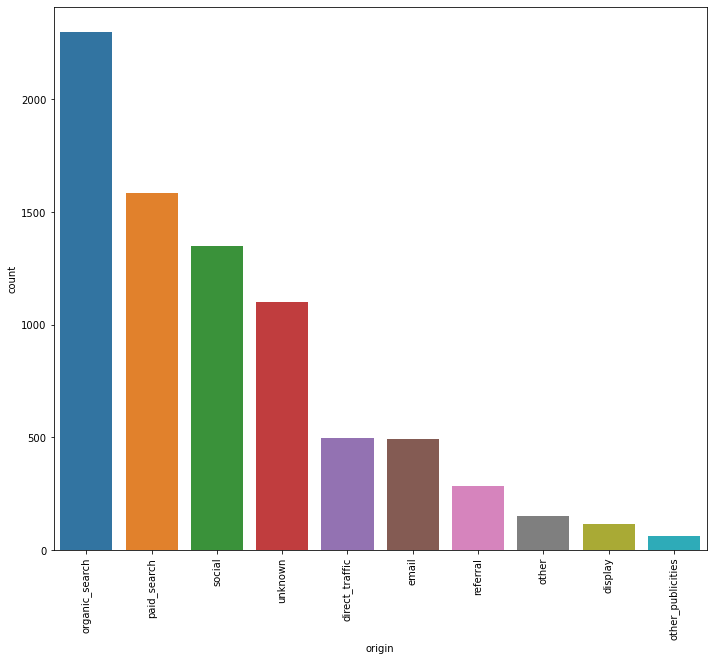

In [67]:
sns.barplot(x = 'origin',
            y = 'count',
            data = df_temp[:59])
plt.xticks(rotation=90)
plt.show()
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,10

### Insights: 

### Organic Search brought in the most number of leads throughout the span of an year.

### Let us break this down further by analysing the performance of the channels in the period of growth (Dec 2017 - Jan 2018)

In [72]:
data_dec=df1[pd.to_datetime('2018-01-01')>df1['first_contact_date']]
data_dec=data_dec[data_dec['first_contact_date']> pd.to_datetime('2017-11-30')]
data_dec=data_dec.reset_index()
data_dec.drop('index',axis=1,inplace=True)
data_dec

,mql_id,first_contact_date,landing_page_id,origin
0,f6257eec25c897969941e5ea2475006c,2017-12-01,58f8c0a253663304e348e81298bc255e,paid_search
1,b1fc0592b638f7319e1bc46972c04b1b,2017-12-01,bdaeb752e5c3caa215ebe04c61e22325,organic_search
2,2d21fefd587c8429da8c2233d1d12346,2017-12-01,1722481ac9e5371e5099dea226b5421d,organic_search
3,512f3a7ea5520eae3b54a77c0497489e,2017-12-01,ffc62d6945fd1423539ec6d96326c37c,display
4,82c915bca7537ef11265aa134511f272,2017-12-01,f017be4dbf86243af5c1ebed0cff36a2,referral
...,...,...,...,...
195,6d1ca411fcbc6a21484877d59be651db,2017-12-31,22c29808c4f815213303f8933030604c,display
196,676c0c9be43fd984c92b0ecfdab3c0d9,2017-12-31,15cf89bab2c3163b4f9d8601d108f8b2,display
197,591d38180c9c6ab36c6d366201a3b7e1,2017-12-31,649b7b8b46b254497e92038d88f6ced8,social
198,676a5420f160ad3e229d508cd3aefb1f,2017-12-31,88740e65d5d6b056e0cda098e1ea6313,social


In [73]:
data_jan=df1[pd.to_datetime('2018-02-01')>df1['first_contact_date']]
data_jan=data_jan[data_jan['first_contact_date']> pd.to_datetime('2017-12-31')]
data_jan=data_jan.reset_index()
data_jan.drop('index',axis=1,inplace=True)
data_jan

,mql_id,first_contact_date,landing_page_id,origin
0,c2a784a6cda726ef5f845e9192adb64b,2018-01-01,40dec9f3d5259a3d2dbcdab2114fae47,paid_search
1,10fbe18a1f152d7b4c7ab027cb719c9f,2018-01-01,88740e65d5d6b056e0cda098e1ea6313,social
2,98eb573ff019b2f5725efdcf36dc19f3,2018-01-01,e492ee5eaf1697716985cc6f33f9cd9b,direct_traffic
3,c24c47dd1b2e9aac64cab553d94a22d7,2018-01-01,40dec9f3d5259a3d2dbcdab2114fae47,referral
4,7fd23d812013ce3b530b821d855bccbf,2018-01-01,d83b0d0e48c8447d1d5507a44027a955,organic_search
...,...,...,...,...
1136,1408f1a274dfa0469b0501dd323f83c1,2018-01-31,b6cd08ac77c501fd6857f7916d2c24f3,organic_search
1137,667f061b738858573caad66f5cc56b32,2018-01-31,a7982125ff7aa3b2054c6e44f9d28522,organic_search
1138,7f306704b558d9577d8c9059f208ab6e,2018-01-31,88740e65d5d6b056e0cda098e1ea6313,social
1139,bb3e90115fe0edc297846a47dc731ae4,2018-01-31,b76ef37428e6799c421989521c0e5077,unknown


### Absolute numbers wont give us a deeper insight into the Channel performance. Hence, Let's analyze the proportion of channel contribution to the number of Leads. 

In [88]:
origin_dec=pd.DataFrame(data_dec['origin'].value_counts().reset_index())
origin_dec.rename({'index':'origin','origin':'count'}, axis=1, inplace=True)
origin_dec['proportions']=(origin_dec['count']/origin_dec['count'].sum())*100
origin_dec


,origin,count,proportions
0,organic_search,60,30.456853
1,social,39,19.796954
2,paid_search,35,17.766497
3,unknown,25,12.690355
4,email,12,6.091371
5,direct_traffic,10,5.076142
6,referral,9,4.568528
7,display,5,2.538071
8,other_publicities,1,0.507614
9,other,1,0.507614


In [ ]:
sns.barplot(x = 'origin',
            y = 'count',
            data = df_temp[:59])
plt.xticks(rotation=90)
plt.show()
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,10

In [90]:
origin_jan=pd.DataFrame(data_jan['origin'].value_counts().reset_index())
origin_jan.rename({'index':'origin','origin':'count'}, axis=1, inplace=True)
origin_jan['proportions']=(origin_jan['count']/origin_jan['count'].sum())*100
origin_jan


,origin,count,proportions
0,organic_search,412,36.267606
1,paid_search,170,14.964789
2,social,162,14.260563
3,unknown,151,13.292254
4,direct_traffic,82,7.218310
5,email,61,5.369718
6,referral,41,3.609155
7,other,39,3.433099
8,display,11,0.968310
9,other_publicities,7,0.616197


### We have the proportions of the marketing channel contribution in Dec 2017 and Jan 2018.
### Let us compare them and investigate what worked out for the Marketplace.

### In order to check if there is significant difference in the proportions, we will perform Hypothesis Testing (One population proportion testing).

### Null Hypothesis  (n0) : There is no significant change in the proportions. Any change observed is purely due to chance.

### Alternative Hypothesis (n1) : The change in the Marketing Channel effectiveness is significant and must be investigated.  


In [276]:
df_hyptest = pd.DataFrame({'channel': [1,2,3,4,5,6,7,8,9,0], 'P-value':[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,0.0],'Change in proportion?': [1,2,3,4,5,6,7,8,9,0]})

In [280]:

for i in range(10):
    n = 1141
    pnull=(origin_dec['proportions']/100)[i]
    phat=(origin_jan['proportions']/100)[i]
    if phat>pnull:
        df_hyptest['P-value'][i]=sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')[1]
        if sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')[1]<0.05:
            df_hyptest['channel'][i] = origin_jan['origin'][i]
            df_hyptest['Change in proportion?'][i] = 'significant increase'
            
        else:
            df_hyptest['channel'][i] = origin_jan['origin'][i]
            df_hyptest['Change in proportion?'][i] = 'No change'
    else:
        df_hyptest['P-value'][i]=sm.stats.proportions_ztest(phat * n, n, pnull, alternative='smaller')[1]
        if sm.stats.proportions_ztest(phat * n, n, pnull, alternative='smaller')[1]<0.05:
            df_hyptest['channel'][i] = origin_jan['origin'][i]
            df_hyptest['Change in proportion?'][i] = 'significant decrease'
        else:
            df_hyptest['channel'][i] = origin_jan['origin'][i]
            df_hyptest['Change in proportion?'][i] = 'No Change'
df_hyptest

,channel,P-value,Change in proportion?
0,organic_search,0.000022,significant increase
1,paid_search,0.000002,significant decrease
2,social,0.000354,significant decrease
3,unknown,0.274627,No change
4,direct_traffic,0.070654,No change
5,email,0.329998,No change
6,referral,0.041155,significant decrease
7,other,0.048413,significant increase
8,display,0.056014,No change
9,other_publicities,0.319645,No change


### Insights:
### There was a 20%  increase (30% to 36%) in the contribution (proportion) of organic searches towards leads generation in the period of growth. This is a statistically significant result.
### The other Channels either decreased in contribution or remained stagnant.
### Hence, Organic Searches are an essential driver of brand awareness. The B2B Marketplace must invest in Search Engine Optimisation to drive organic traffic and experience a Top of the funnel growth (Brand Awareness). 

In [119]:
df1

,mql_id,first_contact_date,landing_page_id,origin
0,0b99dab71519032b917dc641cdd7ac5b,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,NaN
1,6dd0ef38856fd5fb21aed5223aea9e66,2017-06-14,8f08d2ef8b9aec2ec5118fbcf7f96f11,display
2,70bd89abdbdba90e471cd3d0bbdbac49,2017-06-16,8f08d2ef8b9aec2ec5118fbcf7f96f11,unknown
3,98c9832865e4ab224a1649e8e6e9a2a0,2017-06-20,b6cd08ac77c501fd6857f7916d2c24f3,email
4,e1e32379b464961f67fba6ddf6d4b3b7,2017-07-02,0b37d43dbde6452cdd94c17bf61a88e4,direct_traffic
...,...,...,...,...
7995,10bd89509a170e478e62697df43a5984,2018-05-31,58326e62183c14b0c03085c33b9fdc44,social
7996,6649b621033ae95a2e9da0dd9c99fa48,2018-05-31,320669df6e03fc8a691a1a4c61c56a32,unknown
7997,9012a1c75d959d58edd3a3fc1c0f5b75,2018-05-31,58326e62183c14b0c03085c33b9fdc44,social
7998,60041d31882e8d08e106b82dd4197a76,2018-05-31,ce1a65abd0973638f1c887a6efcfa82d,organic_search


## Let us investigate which channels are crucial for maintaining the brand awareness for the marketplace.

In [120]:
df1['month-year']=df1['first_contact_date']

for i in range(len(df1)):
    df1['month-year'][i] = str(df1['first_contact_date'][i].month ) +'-'+ str(df1['first_contact_date'][i].year)
    
df1['month-year']=pd.to_datetime(df1['month-year'])
df1

<ipython-input-120-2cca2aa516a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month-year'][i] = str(df1['first_contact_date'][i].month ) +'-'+ str(df1['first_contact_date'][i].year)
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,mql_id,first_contact_date,landing_page_id,origin,month-year
0,0b99dab71519032b917dc641cdd7ac5b,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,NaN,2017-06-01
1,6dd0ef38856fd5fb21aed5223aea9e66,2017-06-14,8f08d2ef8b9aec2ec5118fbcf7f96f11,display,2017-06-01
2,70bd89abdbdba90e471cd3d0bbdbac49,2017-06-16,8f08d2ef8b9aec2ec5118fbcf7f96f11,unknown,2017-06-01
3,98c9832865e4ab224a1649e8e6e9a2a0,2017-06-20,b6cd08ac77c501fd6857f7916d2c24f3,email,2017-06-01
4,e1e32379b464961f67fba6ddf6d4b3b7,2017-07-02,0b37d43dbde6452cdd94c17bf61a88e4,direct_traffic,2017-07-01
...,...,...,...,...,...
7995,10bd89509a170e478e62697df43a5984,2018-05-31,58326e62183c14b0c03085c33b9fdc44,social,2018-05-01
7996,6649b621033ae95a2e9da0dd9c99fa48,2018-05-31,320669df6e03fc8a691a1a4c61c56a32,unknown,2018-05-01
7997,9012a1c75d959d58edd3a3fc1c0f5b75,2018-05-31,58326e62183c14b0c03085c33b9fdc44,social,2018-05-01
7998,60041d31882e8d08e106b82dd4197a76,2018-05-31,ce1a65abd0973638f1c887a6efcfa82d,organic_search,2018-05-01


In [199]:
df_cross=pd.crosstab(df1['month-year'],df1['origin'])
df_cross

origin,direct_traffic,display,email,organic_search,other,other_publicities,paid_search,referral,social,unknown
month-year,,,,,,,,,,
2017-06-01,0,1,1,0,0,0,0,0,0,1
2017-07-01,16,19,19,54,12,3,56,8,12,35
2017-08-01,22,2,24,122,3,2,79,16,45,70
2017-09-01,22,5,23,78,9,4,64,12,56,39
2017-10-01,23,5,30,125,8,11,100,8,52,53
2017-11-01,26,6,37,121,3,3,70,20,95,63
2017-12-01,10,5,12,60,1,1,35,9,39,25
2018-01-01,82,11,61,412,39,7,170,41,162,151
2018-02-01,65,18,68,291,16,5,212,34,156,156


In [200]:
df_cross['numberofleads']=df1.groupby('month-year')['mql_id'].count()

In [201]:
df_cross

origin,direct_traffic,display,email,organic_search,other,other_publicities,paid_search,referral,social,unknown,numberofleads
month-year,,,,,,,,,,,
2017-06-01,0,1,1,0,0,0,0,0,0,1,4
2017-07-01,16,19,19,54,12,3,56,8,12,35,239
2017-08-01,22,2,24,122,3,2,79,16,45,70,386
2017-09-01,22,5,23,78,9,4,64,12,56,39,312
2017-10-01,23,5,30,125,8,11,100,8,52,53,416
2017-11-01,26,6,37,121,3,3,70,20,95,63,445
2017-12-01,10,5,12,60,1,1,35,9,39,25,200
2018-01-01,82,11,61,412,39,7,170,41,162,151,1141
2018-02-01,65,18,68,291,16,5,212,34,156,156,1028


In [202]:
df_cross[df_cross.columns]

origin,direct_traffic,display,email,organic_search,other,other_publicities,paid_search,referral,social,unknown,numberofleads
month-year,,,,,,,,,,,
2017-06-01,0,1,1,0,0,0,0,0,0,1,4
2017-07-01,16,19,19,54,12,3,56,8,12,35,239
2017-08-01,22,2,24,122,3,2,79,16,45,70,386
2017-09-01,22,5,23,78,9,4,64,12,56,39,312
2017-10-01,23,5,30,125,8,11,100,8,52,53,416
2017-11-01,26,6,37,121,3,3,70,20,95,63,445
2017-12-01,10,5,12,60,1,1,35,9,39,25,200
2018-01-01,82,11,61,412,39,7,170,41,162,151,1141
2018-02-01,65,18,68,291,16,5,212,34,156,156,1028


In [203]:
df_cross.corr()['numberofleads']

origin
direct_traffic       0.986529
display              0.655370
email                0.919559
organic_search       0.977553
other                0.763822
other_publicities    0.751953
paid_search          0.976895
referral             0.978093
social               0.922516
unknown              0.977591
numberofleads        1.000000
Name: numberofleads, dtype: float64

In [204]:
for i in range(len(df_cross)):
    list1=[]
    for j in range(len(df_cross.iloc[0])-1):
        list1.append((df_cross.iloc[i][j] / (df_cross.iloc[i].sum()-df_cross['numberofleads'][i]))*100)
    list1.append(df_cross.iloc[i][-1])
    df_cross.iloc[i]=list1
        
    


In [205]:
df_cross

origin,direct_traffic,display,email,organic_search,other,other_publicities,paid_search,referral,social,unknown,numberofleads
month-year,,,,,,,,,,,
2017-06-01,0.000000,33.333333,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,4.0
2017-07-01,6.837607,8.119658,8.119658,23.076923,5.128205,1.282051,23.931624,3.418803,5.128205,14.957265,239.0
2017-08-01,5.714286,0.519481,6.233766,31.688312,0.779221,0.519481,20.519481,4.155844,11.688312,18.181818,386.0
2017-09-01,7.051282,1.602564,7.371795,25.000000,2.884615,1.282051,20.512821,3.846154,17.948718,12.500000,312.0
2017-10-01,5.542169,1.204819,7.228916,30.120482,1.927711,2.650602,24.096386,1.927711,12.530120,12.771084,416.0
2017-11-01,5.855856,1.351351,8.333333,27.252252,0.675676,0.675676,15.765766,4.504505,21.396396,14.189189,445.0
2017-12-01,5.076142,2.538071,6.091371,30.456853,0.507614,0.507614,17.766497,4.568528,19.796954,12.690355,200.0
2018-01-01,7.218310,0.968310,5.369718,36.267606,3.433099,0.616197,14.964789,3.609155,14.260563,13.292254,1141.0
2018-02-01,6.366308,1.762977,6.660137,28.501469,1.567091,0.489716,20.763957,3.330069,15.279138,15.279138,1028.0


In [207]:
df_cross.corr()['numberofleads']

origin
direct_traffic       0.466274
display             -0.495012
email               -0.499720
organic_search       0.450732
other                0.092285
other_publicities   -0.090600
paid_search          0.342974
referral             0.275950
social               0.510252
unknown             -0.450816
numberofleads        1.000000
Name: numberofleads, dtype: float64

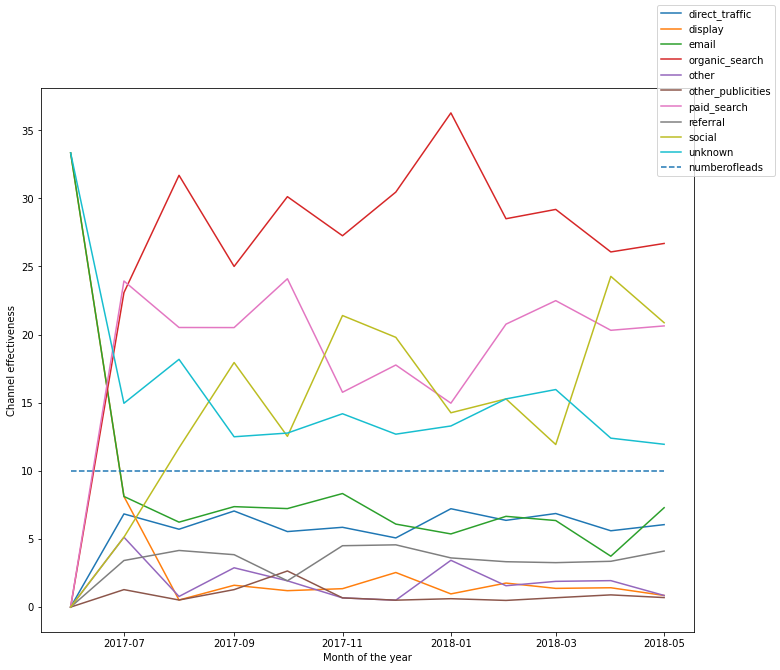

In [287]:
fig, ax = plt.subplots()
for i in range(len(list(df_cross.columns))-1):
    sns.lineplot(x="month-year", y=df_cross.columns[i],
             data=df_cross)
sns.lineplot(x="month-year", y=[10]*12,data=df_cross, linestyle="dashed")
ax. set(xlabel='Month of the year', ylabel='Channel effectiveness') 
fig.legend(labels=df_cross.columns)

### Insights: There are major channels that maintain brand awareness: 
### 1) Organic Search
### 2) Paid search
### 3) Social Media marketing

### Out of the 3, organic traffic drives growth in Brand awareness, as discussed previously. 

# Key take aways, Actionable Conclusions and Further Plan of Action:

## Key Take aways:
1) There was a 550% increase in growth in the leads generated in the month of January 2018

#### Marketing Channel effectiveness:

2) This growth was driven by Organic traffic, the contribution of which, towards lead generation increased by massive 20%. This is a statistcally significant result.

3) The channels that maintain Lead generation are Paid search and Social Media Marketing. 

#### Landing Pages: 
4) 495 Landing pages were developed out of which 58(11.7%) Landing pages bring in 80% of the leads.

5) 'b76ef37428e6799c421989521c0e5077' and '22c29808c4f815213303f8933030604c' bring in significantly more leads than the others.


## From the above take aways we conclude that:

1) The growth pattern of January 2018 can be replicated by driving organic traffic to the landing pages.

2) With respect to the Landing pages, the goal is to replicate the success of 'b76ef37428e6799c421989521c0e5077' and '22c29808c4f815213303f8933030604c'. 

## Further Plan of Action: 

1) The B2B market place must invest heavily in SEO to drive growth in brand awareness. (This could have been quantified had the Marketing Channel investment data been available).

2) To keep a steady inflow of leads coming in, the brand must keep investing in Paid search and Social media marketing. 

3) To replicate the success of 'b76ef37428e6799c421989521c0e5077' and '22c29808c4f815213303f8933030604c' the marketplace must  conduct further experimentation via A/B testing.
    